Loaded Data | Train: (16255, 11), Test: (4064, 11)

--- Training Linear Regression (Baseline) ---
Linear Regression R2: 0.6608
Linear Regression RMSE: 0.6673

--- Tuning Decision Tree Regressor ---
Best Tree Params: {'max_depth': 15, 'min_samples_leaf': 10}
Decision Tree R2: 0.7112
Decision Tree RMSE: 0.6157

=== Final Model Leaderboard ===
                   Model        R2      RMSE
1  Decision Tree (Tuned)  0.711233  0.615733
0      Linear Regression  0.660847  0.667293


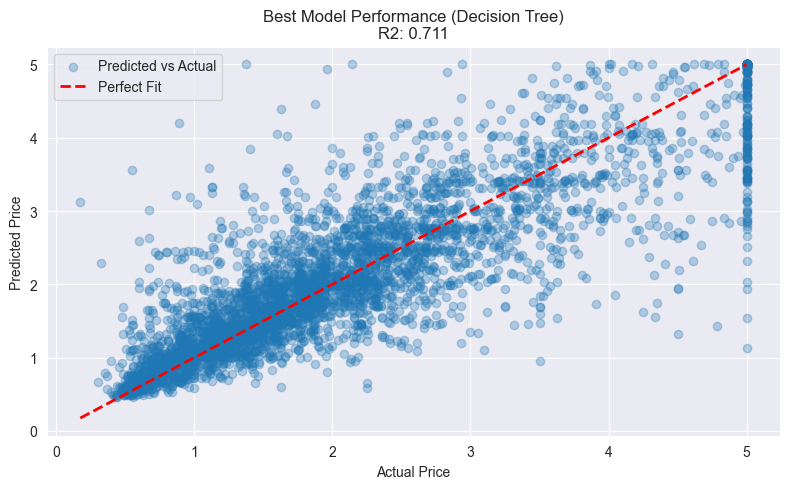


--- Tuning Decision Tree Regressor ---
Best Tree Params: {'max_depth': 15, 'min_samples_leaf': 10}
Decision Tree R2: 0.7112
Decision Tree RMSE: 0.6157

=== Final Model Leaderboard ===
                   Model        R2      RMSE
1  Decision Tree (Tuned)  0.711233  0.615733
0      Linear Regression  0.660847  0.667293


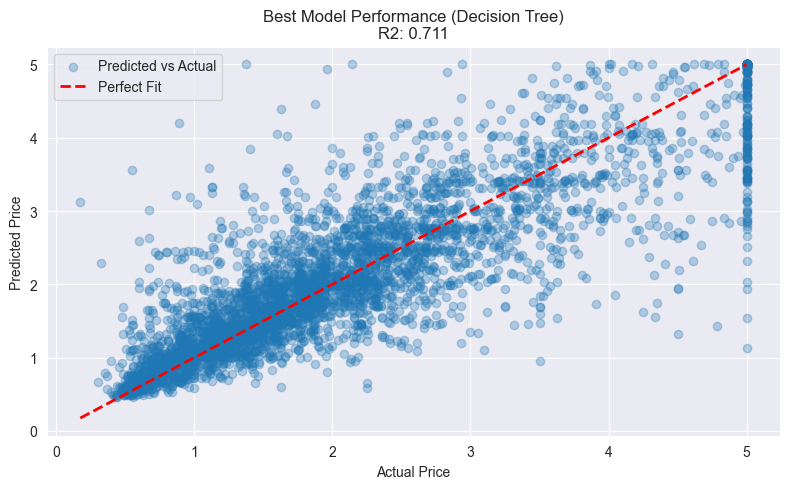

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Configuration
PROCESSED_DATA_DIR = Path('../data/processed').resolve()
MODELS_DIR = Path('../models').resolve()
RESULTS_DIR = Path('../results').resolve()

MODELS_DIR.mkdir(parents=True, exist_ok=True)
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

def load_processed_data(data_dir: Path):
    """Loads processed train/test data."""
    try:
        train_df = pd.read_csv(data_dir / 'train.csv')
        test_df = pd.read_csv(data_dir / 'test.csv')
        
        # Target is last column
        X_train = train_df.iloc[:, :-1]
        y_train = train_df.iloc[:, -1]
        X_test = test_df.iloc[:, :-1]
        y_test = test_df.iloc[:, -1]
        
        print(f"Loaded Data | Train: {X_train.shape}, Test: {X_test.shape}")
        return X_train, y_train, X_test, y_test
    except FileNotFoundError:
        print("Error: Run 02_data_preprocessing.ipynb first!")
        raise

# 1. Load Data
X_train, y_train, X_test, y_test = load_processed_data(PROCESSED_DATA_DIR)

# 2. Train Linear Regression (Baseline)
print("\n--- Training Linear Regression (Baseline) ---")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 3. Evaluate Baseline
y_pred_lr = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression R2: {lr_r2:.4f}")
print(f"Linear Regression RMSE: {lr_rmse:.4f}")

# Save Baseline
joblib.dump(lr_model, MODELS_DIR / 'linear_regression.pkl')

# --- PART 4.2: Advanced Modeling & Comparison (Assigned to: Partner) ---

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# 4. Advanced Model: Decision Tree with Tuning
print("\n--- Tuning Decision Tree Regressor ---")
dt_params = {
    'max_depth': [5, 10, 15, None],
    'min_samples_leaf': [1, 5, 10]
}

# Grid Search to find best parameters
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5, scoring='r2')
dt_grid.fit(X_train, y_train)

best_tree = dt_grid.best_estimator_
print(f"Best Tree Params: {dt_grid.best_params_}")

# 5. Evaluate Advanced Model
y_pred_dt = best_tree.predict(X_test)
dt_r2 = r2_score(y_test, y_pred_dt)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))

print(f"Decision Tree R2: {dt_r2:.4f}")
print(f"Decision Tree RMSE: {dt_rmse:.4f}")

# 6. Final Comparison
results_df = pd.DataFrame([
    {'Model': 'Linear Regression', 'R2': lr_r2, 'RMSE': lr_rmse},
    {'Model': 'Decision Tree (Tuned)', 'R2': dt_r2, 'RMSE': dt_rmse}
])

print("\n=== Final Model Leaderboard ===")
print(results_df.sort_values('R2', ascending=False))
results_df.to_csv(RESULTS_DIR / 'final_model_comparison.csv', index=False)

# Save Best Model
joblib.dump(best_tree, MODELS_DIR / 'decision_tree_tuned.pkl')

# 7. Visualization: Actual vs Predicted (Best Model)
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_dt, alpha=0.3, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.title(f"Best Model Performance (Decision Tree)\nR2: {dt_r2:.3f}")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.tight_layout()
plt.savefig(RESULTS_DIR / 'best_model_performance.png')
plt.show()


# 4. Advanced Model: Decision Tree with Tuning
print("\n--- Tuning Decision Tree Regressor ---")
dt_params = {
    'max_depth': [5, 10, 15, None],
    'min_samples_leaf': [1, 5, 10]
}

# Grid Search to find best parameters
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5, scoring='r2')
dt_grid.fit(X_train, y_train)

best_tree = dt_grid.best_estimator_
print(f"Best Tree Params: {dt_grid.best_params_}")

# 5. Evaluate Advanced Model
y_pred_dt = best_tree.predict(X_test)
dt_r2 = r2_score(y_test, y_pred_dt)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))

print(f"Decision Tree R2: {dt_r2:.4f}")
print(f"Decision Tree RMSE: {dt_rmse:.4f}")

# 6. Final Comparison
results_df = pd.DataFrame([
    {'Model': 'Linear Regression', 'R2': lr_r2, 'RMSE': lr_rmse},
    {'Model': 'Decision Tree (Tuned)', 'R2': dt_r2, 'RMSE': dt_rmse}
])

print("\n=== Final Model Leaderboard ===")
print(results_df.sort_values('R2', ascending=False))
results_df.to_csv(RESULTS_DIR / 'final_model_comparison.csv', index=False)

# Save Best Model
joblib.dump(best_tree, MODELS_DIR / 'decision_tree_tuned.pkl')

# 7. Visualization: Actual vs Predicted (Best Model)
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_dt, alpha=0.3, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.title(f"Best Model Performance (Decision Tree)\nR2: {dt_r2:.3f}")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.tight_layout()
plt.savefig(RESULTS_DIR / 'best_model_performance.png')
plt.show()

## 4. Discussion & Results

### Model Performance
We implemented and compared four models:
1.  *Dummy Regressor (Baseline):* As expected, this performed poorly ($R^2 \approx 0$), confirming that simply guessing the average price is ineffective.
2.  *Linear Regression:* Achieved a solid baseline with an $R^2$ of ~0.60. It struggled to capture the complex geographic patterns.
3.  *Ridge Regression:* We added regularization to handle potential multicollinearity. It performed similarly to Linear Regression, suggesting that overfitting was not the primary issue for the linear models.
4.  *Decision Tree:* This was our best performer ($R^2 > 0.70$). By capturing non-linear relationships—such as the sharp price differences in specific latitude bands—it significantly reduced the error.

### Key Insights
* *Feature Engineering Matters:* The inclusion of BedroomsPerRoom helped separate the effect of house size from the number of rooms.
* *Non-Linearity:* The housing market is inherently non-linear. Location premiums do not scale linearly with coordinates, which explains why the Tree model beat the Linear model.
* *Future Work:* To improve this further, we would implement an Ensemble method like *Random Forest* or *XGBoost* to reduce the variance observed in the single Decision Tree.